# 미국에서 수입거부된 업체(품목, 국가 등)가 한국에 있는가? 있다면 수입거부되었는기?

In [135]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings(action='ignore') 

import pandas as pd

In [149]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '결측치 수(null)' : df.isnull().sum(),
                       '결측치 비율(%)' : (df.isnull().sum()/len(df)).round(2),
                       '고유값 수(nunique)' : df.nunique(),
                      })
    for col in tf.index:
        tf.loc[col, '자료 내용(contents)'] = str(df[col].unique()[0:5])
        tf.loc[col, 'nan 비율'] = int(df[df[col] == 'nan'].shape[0]/len(df)*100)
        
    return tf

# 0. WTO
- https://stats.wto.org/
## Agricultral
## 특정 농산물의 대외 수출이 많은 국가를 선별 (상위 10위) - 국내순위는?

## The world’s largest food exporters and importers in 2020
https://www.opportimes.com/the-worlds-largest-food-exporters-and-importers-in-2020/

- 단국대 양성범 교수에게 문의

<img src = 'https://www.opportimes.com/wp-content/uploads/2021/08/Alimentos-uno.png'>
<img src='https://www.opportimes.com/wp-content/uploads/2021/08/alimentos-dos.png'>

In [145]:
df = pd.read_excel('../data/WtoData_20221101162218.xlsx',header=2)
df

,Reporting Economy,Product/Sector,Partner Economy,2015,2016,2017,2018,2019,2020,2021
0,World,SI3_AGG - TO - Total merchandise,World,16554236.0,16035818.0,17740817.0,19549257.0,19014239.0,17648397.0,22328088.0
1,World,SI3_AGG - AG - Agricultural products,World,1564085.0,1584129.0,1725209.0,1804030.0,1779888.0,1803125.0,NaN
2,World,SI3_AGG - AGFO - Food,World,1331133.0,1355836.0,1468845.0,1530116.0,1526959.0,1568080.0,NaN
3,World,SI3_AGG - MI - Fuels and mining products,World,2380516.0,2037338.0,2615144.0,3270231.0,3087959.0,2325713.0,NaN
4,World,SI3_AGG - MIFU - Fuels,World,1808607.0,1495824.0,1949140.0,2530201.0,2364889.0,1572747.0,NaN
...,...,...,...,...,...,...,...,...,...,...
3368,Zimbabwe,SI3_AGG - MAMTOTIC - Integrated circuits and e...,World,1.0,0.0,0.0,0.0,0.0,0.0,NaN
3369,Zimbabwe,SI3_AGG - MAMTTE - Transport equipment,World,12.0,13.0,14.0,11.0,27.0,11.0,NaN
3370,Zimbabwe,SI3_AGG - MAMTAU - Automotive products,World,5.0,4.0,6.0,3.0,4.0,3.0,NaN
3371,Zimbabwe,SI3_AGG - MATE - Textiles,World,16.0,11.0,7.0,9.0,7.0,6.0,NaN


In [151]:
agrproducts = df[df['Product/Sector'].str.contains('Agricultural products')]
agrproducts
summary(agrproducts)

,Reporting Economy,Product/Sector,Partner Economy,2015,2016,2017,2018,2019,2020,2021
1,World,SI3_AGG - AG - Agricultural products,World,1564085.0,1584129.0,1725209.0,1804030.0,1779888.0,1803125.0,NaN
19,Afghanistan,SI3_AGG - AG - Agricultural products,World,361.0,437.0,637.0,725.0,730.0,655.0,NaN
40,Albania,SI3_AGG - AG - Agricultural products,World,183.0,218.0,274.0,317.0,338.0,374.0,NaN
58,Algeria,SI3_AGG - AG - Agricultural products,World,247.0,341.0,370.0,278.0,305.0,376.0,NaN
79,Angola,SI3_AGG - AG - Agricultural products,World,118.0,235.0,239.0,288.0,132.0,62.0,NaN
...,...,...,...,...,...,...,...,...,...,...
3279,"Venezuela, Bolivarian Republic of",SI3_AGG - AG - Agricultural products,World,49.0,22.0,23.0,29.0,30.0,29.0,NaN
3297,Viet Nam,SI3_AGG - AG - Agricultural products,World,24431.0,26204.0,30224.0,30390.0,29943.0,29647.0,NaN
3320,Yemen,SI3_AGG - AG - Agricultural products,World,315.0,278.0,374.0,15.0,23.0,29.0,NaN
3338,Zambia,SI3_AGG - AG - Agricultural products,World,710.0,675.0,649.0,635.0,609.0,663.0,NaN


,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(contents),nan 비율
Reporting Economy,object,0,0.00,183,['World' 'Afghanistan' 'Albania' 'Algeria' 'An...,0.0
Product/Sector,object,0,0.00,1,['SI3_AGG - AG - Agricultural products'],0.0
Partner Economy,object,0,0.00,3,['World' 'European Union' 'Extra EU Trade'],0.0
2015,float64,3,0.02,179,[1.564085e+06 3.610000e+02 1.830000e+02 2.4700...,0.0
2016,float64,5,0.03,173,[1.584129e+06 4.370000e+02 2.180000e+02 3.4100...,0.0
2017,float64,3,0.02,172,[1.725209e+06 6.370000e+02 2.740000e+02 3.7000...,0.0
2018,float64,4,0.02,172,[1.80403e+06 7.25000e+02 3.17000e+02 2.78000e+...,0.0
2019,float64,3,0.02,174,[1.779888e+06 7.300000e+02 3.380000e+02 3.0500...,0.0
2020,float64,3,0.02,172,[1.803125e+06 6.550000e+02 3.740000e+02 3.7600...,0.0
2021,float64,185,1.00,0,[nan],0.0


In [154]:
agrproducts[agrproducts.duplicated('Reporting Economy')]

,Reporting Economy,Product/Sector,Partner Economy,2015,2016,2017,2018,2019,2020,2021
1017,European Union,SI3_AGG - AG - Agricultural products,European Union,360287.0,371827.0,404001.0,428898.0,417396.0,422446.0,NaN
1018,European Union,SI3_AGG - AG - Agricultural products,Extra EU Trade,191975.0,194120.0,209121.0,220881.0,224118.0,231404.0,NaN


In [165]:
agrproducts.columns
agrproducts['total amount'] = agrproducts[['2015', '2016', '2017', '2018', '2019', '2020', '2021']].fillna(0).sum(axis=1)
agrproducts.sort_values('total amount', ascending=False).head(20)

Index(['Reporting Economy', 'Product/Sector', 'Partner Economy', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', 'total amount'],
      dtype='object')

,Reporting Economy,Product/Sector,Partner Economy,2015,2016,2017,2018,2019,2020,2021,total amount
1,World,SI3_AGG - AG - Agricultural products,World,1564085.0,1584129.0,1725209.0,1804030.0,1779888.0,1803125.0,NaN,10260466.0
1016,European Union,SI3_AGG - AG - Agricultural products,World,552261.0,565947.0,613123.0,649779.0,641514.0,653850.0,NaN,3676474.0
1017,European Union,SI3_AGG - AG - Agricultural products,European Union,360287.0,371827.0,404001.0,428898.0,417396.0,422446.0,NaN,2404855.0
1018,European Union,SI3_AGG - AG - Agricultural products,Extra EU Trade,191975.0,194120.0,209121.0,220881.0,224118.0,231404.0,NaN,1271619.0
3224,United States of America,SI3_AGG - AG - Agricultural products,World,163371.0,164460.0,168588.0,171413.0,164803.0,170493.0,NaN,1003128.0
2175,Netherlands,SI3_AGG - AG - Agricultural products,World,95128.0,98746.0,106591.0,111833.0,110091.0,112203.0,NaN,634592.0
1197,Germany,SI3_AGG - AG - Agricultural products,World,85939.0,87482.0,92999.0,95769.0,93045.0,93108.0,NaN,548342.0
457,Brazil,SI3_AGG - AG - Agricultural products,World,79988.0,76904.0,87792.0,92906.0,89086.0,93237.0,NaN,519913.0
661,China,SI3_AGG - AG - Agricultural products,World,72678.0,75476.0,78438.0,82790.0,81726.0,78151.0,NaN,469259.0
1105,France,SI3_AGG - AG - Agricultural products,World,68940.0,68153.0,72460.0,77009.0,75225.0,73611.0,NaN,435398.0


## 통관거부사례
- 웹크로링으로 데이터 확보
- http://www.tradenavi.net/CmsWeb/viewPage.req?idx=PG0000001711

In [181]:
df = pd.read_excel('../data/통관거부사례_20210820.xlsx').drop(['Unnamed: 0'], axis=1)
df

,REFUSESEQ,REFUSEYEAR,CATEGORY,CATEGORYNM,PRODUCT,PRODUCTKR,ORIGINCOUNTRY,REFUSEEUYN,FRSTRGDT,LASTMMDT,REFUSECOUNTRY,RNUM,KCOUNTRYNM,REFCAUSESTR
0,IREF19005478,2020,BS16,가공식품,frozen chicken burgers,냉동 햄버거,BG,Y,2.021042e+13,2.021042e+13,GR,1,그리스,"성분(금지, 기준치 초과)::살모넬라균 기준치 초과"
1,IREF19005380,2020,BS16,가공식품,frozen chicken rolls with cheese and bacon,가공 육류,BG,Y,2.021042e+13,2.021042e+13,GR,2,그리스,"성분(금지, 기준치 초과)::살모넬라균 기준치 초과"
2,IREF19004465,2020,BS16,가공식품,fish masala spice mix,향신료,PK,Y,2.021042e+13,2.021042e+13,GR,3,그리스,"성분(금지, 기준치 초과)::아플라톡신 기준치 초과"
3,IREF19003254,2020,BS16,가공식품,croissants,베이커리류,DE,Y,2.021042e+13,2.021042e+13,GR,4,그리스,식품 변질::곰팡이 검출
4,IREF19000853,2020,BS16,가공식품,fish meal,어분,US,Y,2.020111e+13,2.020111e+13,GR,5,그리스,"성분(금지, 기준치 초과)::살모넬라균 기준치 초과"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81556,IRHK17000022,2017,BS13,임산물,Prepackaged dried porcini mushroom,버섯,IT,N,2.019021e+13,2.019021e+13,HK,2,홍콩,"성분(금지, 기준치 초과)::카드뮴 0.17ppm 검출, 카드뮴 기준치는 0.1ppm임"
81557,IRHK18000018,2019,BS12,축산물,Two kinds of prepackaged cooked chicken strips,닭고기,US,N,2.020012e+13,2.020012e+13,HK,1,홍콩,기타::금속조각 검출
81558,IRHK18000020,2019,BS12,축산물,Chilled raw beef product,소고기,US,N,2.020012e+13,2.020012e+13,HK,2,홍콩,"성분(금지, 기준치 초과)::대장균 검출"
81559,IRHK17000003,2017,BS12,축산물,Prepackaged frozen whole duck,냉동 오리,US,N,2.019021e+13,2.019021e+13,HK,3,홍콩,"성분(금지, 기준치 초과)::가금류에서 금지 약물 성분인 클로람페니콜이 검출됨"


In [187]:
df['FRSTRGDT'].isnull().sum()
df['FRSTRGDT'].fillna(method='bfill', inplace=True)
df['FRSTRGDT'].isnull().sum()

1

0

In [1]:
# pd.to_datetime(df['FRSTRGDT'], unit='ms')

## 1. 국내 수입신고민원 건수 불러오기 (2016년 ~ 2020년)

In [120]:
df = pd.read_pickle('../data/수입신고내역결과.pkl')

In [121]:
df.head()
df.shape

,접수번호,제품구분,접수일,신고시기,유형,제품명,제품명(한글),용도코드,용도명,세번부호(HSK),...,필증교부방법,보관창고번호.1,보관업 상호,반입일자,신속검사대상,가온보존대상,진균수시험대상,방사선조사식품,판정조치 구분코드,판정결과
0,201600529568,수산물,2016-06-21 00:00:00,본신고,"오징어(냉동,다리)",FROZEN SQUID(LEG),냉동오징어(다리),1,판매용,307491020,...,NaN,3011717,(주)성보냉장 장림 보세장치장,2016-06-17,N,N,N,N,1,0
1,201600521016,수산물,2016-01-19 00:00:00,본신고,"오징어(냉동,다리)",FROZEN SQUID(LEG),냉동오징어(다리),1,판매용,307491020,...,NaN,3011717,(주)성보냉장 장림 보세장치장,2016-01-19,N,N,N,N,1,0
2,201600524478,수산물,2016-03-28 00:00:00,본신고,"오징어(냉동,동체,자숙)",FROZEN SQUID BOILED(BODY),"냉동오징어(동체,자숙)",1,판매용,1605542099,...,NaN,3011717,(주)성보냉장 장림 보세장치장,2016-03-25,N,N,N,N,1,0
3,201600520164,수산물,2016-01-06 00:00:00,본신고,"오징어(냉동,동체,자숙)",FROZEN SQUID BOILED(BODY),"냉동오징어(동체,자숙)",1,판매용,1605542099,...,NaN,3011717,(주)성보냉장 장림 보세장치장,2016-01-06,N,N,N,N,1,0
4,201600558994,수산물,2016-06-22 00:00:00,본신고,홍어(냉동),FROZEN SKATE,냉동홍어,1,판매용,303822000,...,NaN,3070004,(주)보림로지스틱스부산냉장종합보세사업장,2016-06-21,N,N,N,N,1,0


(3515035, 65)

In [122]:
df.columns

Index(['접수번호', '제품구분', '접수일', '신고시기', '유형', '제품명', '제품명(한글)', '용도코드', '용도명',
       '세번부호(HSK)', 'BL번호', '화물관리번호', '선적일자', '제조국(원산지)코드', '제조국(원산지)',
       '유통기한 시작 일시 ', '유통기한 종료 일시', '보관창고번호', '수출국코드', '수출국', '총항수', '선통관구분',
       '총수량', '총수량단위', '순중량(Kg)', '과세가격', '과세가격($/Kg)', '처리기한', '유기식품 여부',
       '식품조사처리 여부', '영유아섭취대상', '주문자상표부착', '고열량.저영양', '유전자변형식품',
       '서류검사또는환경검사생략대상여무', '수입화주 사업자등록번호', '수입화주 허가번호', '수입화주 상호', '수입화주 업종',
       '대행업자 사업자등록번호', '해외제조업소 등록번호', '해외제조업소명', '해외제조업소 지역', '수출업소 등록번호',
       '수출업소 명', '관세청번호', '항번', '검사명령제도 해당여부', '국내도착항 코드', '국내도착항명', '입항일',
       '선명', '선적항 코드', '선적항명', '선적일', '필증교부방법', '보관창고번호.1', '보관업 상호', '반입일자',
       '신속검사대상', '가온보존대상', '진균수시험대상', '방사선조사식품', '판정조치 구분코드', '판정결과'],
      dtype='object')

In [123]:
df = df[['접수번호', '제품구분', '접수일', '유형', '제품명', '제조국(원산지)', '수출국', '해외제조업소명', '해외제조업소 지역', '수출업소 명', '판정결과']]
df.shape

(3515035, 11)

In [124]:
df.columns

Index(['접수번호', '제품구분', '접수일', '유형', '제품명', '제조국(원산지)', '수출국', '해외제조업소명',
       '해외제조업소 지역', '수출업소 명', '판정결과'],
      dtype='object')

In [125]:
df.head()

,접수번호,제품구분,접수일,유형,제품명,제조국(원산지),수출국,해외제조업소명,해외제조업소 지역,수출업소 명,판정결과
0,201600529568,수산물,2016-06-21 00:00:00,"오징어(냉동,다리)",FROZEN SQUID(LEG),페루,페루,SEAFROST S.A.C.,NaN,SEAFROST S.A.C.,0
1,201600521016,수산물,2016-01-19 00:00:00,"오징어(냉동,다리)",FROZEN SQUID(LEG),페루,페루,ALTAMAR FOODS PERU S.R.L,NaN,ALTAMAR FOODS PERU S.R.L,0
2,201600524478,수산물,2016-03-28 00:00:00,"오징어(냉동,동체,자숙)",FROZEN SQUID BOILED(BODY),페루,페루,SEAFROST S.A.C.,NaN,SEAFROST S.A.C.,0
3,201600520164,수산물,2016-01-06 00:00:00,"오징어(냉동,동체,자숙)",FROZEN SQUID BOILED(BODY),페루,페루,SEAFROST S.A.C.,NaN,SEAFROST S.A.C.,0
4,201600558994,수산물,2016-06-22 00:00:00,홍어(냉동),FROZEN SKATE,아르헨티나,아르헨티나,STYLUS SA,NaN,STYLUS SA,0


In [126]:
df.groupby('제품구분')['판정결과'].mean()*100

제품구분
가공식품         0.276022
건강기능식품       0.883692
기구또는용기.포장    0.169561
농.임산물        0.152025
수산물          0.073400
식품첨가물        0.048006
축산물          0.045558
Name: 판정결과, dtype: float64

## 2. FDA Inpections data 불러오기

In [128]:
inspections = pd.read_excel('../data/inspections.xlsx')

In [129]:
summary(inspections)

,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(contents),nan 비율
FEI Number,int64,0,0.0,103908,[3015344025 3001248951 3015980419 3015275023 3...,0.0
Legal Name,object,0,0.0,94321,"['Noble Imports LLC' 'AKC COMMODITIES, INC' 'A...",0.0
City,object,0,0.0,19109,['Edison' 'Piscataway' 'Worcester' 'Montclair'...,0.0
State,object,0,0.0,57,['New Jersey' 'Massachusetts' 'New York' 'Cali...,0.0
Zip,object,0,0.0,17131,['08817' '08854' '01607' '07042' '10016'],0.0
Country/Area,object,0,0.0,126,['United States' 'China' 'Germany' 'France' 'G...,0.0
Fiscal Year,int64,0,0.0,13,[2021 2020 2019 2018 2017],0.0
Inspection ID,int64,0,0.0,201680,[1137498 1137284 1137190 1137084 1137059],0.0
Posted Citations,object,0,0.0,2,['No' 'Yes'],0.0
Inspection End Date,datetime64[ns],0,0.0,3704,['2021-03-31T00:00:00.000000000' '2021-03-30T0...,0.0


In [130]:
inspections.head()
inspections.shape
inspections.columns

,FEI Number,Legal Name,City,State,Zip,Country/Area,Fiscal Year,Inspection ID,Posted Citations,Inspection End Date,Classification,Project Area,Product Type,FMD-145 Date,Firm Profile
0,3015344025,Noble Imports LLC,Edison,New Jersey,08817,United States,2021,1137498,No,2021-03-31,No Action Indicated (NAI),Foodborne Biological Hazards,Food/Cosmetics,-,https://datadashboard.fda.gov/ora/firmprofile....
1,3001248951,"AKC COMMODITIES, INC",Piscataway,New Jersey,08854,United States,2021,1137284,Yes,2021-03-30,Voluntary Action Indicated (VAI),Foodborne Biological Hazards,Food/Cosmetics,-,https://datadashboard.fda.gov/ora/firmprofile....
2,3015980419,ACCRA SUPERMARKET LLC,Worcester,Massachusetts,01607,United States,2021,1137190,Yes,2021-03-26,Voluntary Action Indicated (VAI),Foodborne Biological Hazards,Food/Cosmetics,-,https://datadashboard.fda.gov/ora/firmprofile....
3,3015275023,TOOTSI IMPEX USA,Montclair,New Jersey,07042,United States,2021,1137084,Yes,2021-03-25,Voluntary Action Indicated (VAI),Foodborne Biological Hazards,Food/Cosmetics,-,https://datadashboard.fda.gov/ora/firmprofile....
4,3014249688,FILICORI ZECCHINI USA CORP,New York,New York,10016,United States,2021,1137059,Yes,2021-03-24,Voluntary Action Indicated (VAI),Foodborne Biological Hazards,Food/Cosmetics,-,https://datadashboard.fda.gov/ora/firmprofile....


(246821, 15)

Index(['FEI Number', 'Legal Name', 'City', 'State', 'Zip', 'Country/Area',
       'Fiscal Year', 'Inspection ID', 'Posted Citations',
       'Inspection End Date', 'Classification', 'Project Area', 'Product Type',
       'FMD-145 Date', 'Firm Profile'],
      dtype='object')

## 3. FDA Inpections 결과 (District Decision/Classification)
### OAI와 VAI 처분을 받은 업체이면서 한국에 수입신고를 한 업체 탐색 (일명 freakyman)
- OAI – Official Action Indicated (강한행정처분)
- NAI – No Action Indicated  (행정처분 없음)
- VAI – Voluntary Action Indicated  (중간행정처분)

### mapping 해보기 (국내 '해외제조업소명', FDA 'Legal Name')

In [131]:
mfds = set(df['해외제조업소명'])
fda_inspection = set(inspections['Legal Name'])

In [132]:
len(mfds)
len(fda_inspection )

414611

94321

In [133]:
unions = (mfds & fda_inspection)
len(unions)

298

In [134]:
inspections.loc[inspections['Legal Name'].isin(unions), :].head()
inspections.loc[inspections['Legal Name'].isin(unions), :]['Classification'].value_counts()

,FEI Number,Legal Name,City,State,Zip,Country/Area,Fiscal Year,Inspection ID,Posted Citations,Inspection End Date,Classification,Project Area,Product Type,FMD-145 Date,Firm Profile
1071,2025199,"Schreiber Foods, Inc.",Tempe,Arizona,85282,United States,2021,1132708,No,2020-10-08,No Action Indicated (NAI),Foodborne Biological Hazards,Food/Cosmetics,-,https://datadashboard.fda.gov/ora/firmprofile....
2944,3000719147,Leprino Foods Company,Fort Morgan,Colorado,80701,United States,2020,1123182,No,2020-03-10,No Action Indicated (NAI),Foodborne Biological Hazards,Food/Cosmetics,-,https://datadashboard.fda.gov/ora/firmprofile....
3297,3013302296,THE JEL SERT COMPANY,West Chicago,Illinois,60185,United States,2020,1121570,No,2020-03-03,No Action Indicated (NAI),"Food Composition, Standards, Labeling and Econ",Food/Cosmetics,-,https://datadashboard.fda.gov/ora/firmprofile....
3298,3013302296,THE JEL SERT COMPANY,West Chicago,Illinois,60185,United States,2020,1121570,No,2020-03-03,No Action Indicated (NAI),Foodborne Biological Hazards,Food/Cosmetics,-,https://datadashboard.fda.gov/ora/firmprofile....
3422,3004295520,SOCIETE FROMAGERE DE LONS LE SAUNIER,Lons le Saunier,-,-,France,2020,1119666,Yes,2020-02-28,Voluntary Action Indicated (VAI),"Food Composition, Standards, Labeling and Econ",Food/Cosmetics,-,https://datadashboard.fda.gov/ora/firmprofile....


No Action Indicated (NAI)           1186
Voluntary Action Indicated (VAI)     287
Official Action Indicated (OAI)       12
Name: Classification, dtype: int64

In [54]:
data = inspections.loc[inspections['Legal Name'].isin(unions), :]
data[data['Classification'] != 'No Action Indicated (NAI)']
freakyman = set(data[data['Classification'] != 'No Action Indicated (NAI)']['Legal Name'])

,FEI Number,Legal Name,City,State,Zip,Country/Area,Fiscal Year,Inspection ID,Posted Citations,Inspection End Date,Classification,Project Area,Product Type,FMD-145 Date,Firm Profile
3422,3004295520,SOCIETE FROMAGERE DE LONS LE SAUNIER,Lons le Saunier,-,-,France,2020,1119666,Yes,2020-02-28,Voluntary Action Indicated (VAI),"Food Composition, Standards, Labeling and Econ",Food/Cosmetics,-,https://datadashboard.fda.gov/ora/firmprofile....
3423,3004295520,SOCIETE FROMAGERE DE LONS LE SAUNIER,Lons le Saunier,-,-,France,2020,1119666,Yes,2020-02-28,Voluntary Action Indicated (VAI),Foodborne Biological Hazards,Food/Cosmetics,-,https://datadashboard.fda.gov/ora/firmprofile....
3640,1000474076,BASF A/S,Ballerup,-,-,Denmark,2020,1128395,No,2020-02-27,Voluntary Action Indicated (VAI),Drug Quality Assurance,Drugs,-,https://datadashboard.fda.gov/ora/firmprofile....
5793,3002807213,IOI OLEO GMBH,Witten,-,-,Germany,2020,1115443,Yes,2020-01-17,Voluntary Action Indicated (VAI),Drug Quality Assurance,Drugs,-,https://datadashboard.fda.gov/ora/firmprofile....
7037,3002698300,Asian Sea Corporation Public Company Limited,Mueang Samut Sakhon,-,-,Thailand,2020,1113748,Yes,2019-12-13,Voluntary Action Indicated (VAI),Foodborne Biological Hazards,Food/Cosmetics,-,https://datadashboard.fda.gov/ora/firmprofile....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241451,1833004,Leprino Foods Company,Remus,Michigan,49340,United States,2009,565862,No,2009-02-26,Voluntary Action Indicated (VAI),Foodborne Biological Hazards,Food/Cosmetics,-,https://datadashboard.fda.gov/ora/firmprofile....
241664,1711156,Leprino Foods Company,Denver,Colorado,80211,United States,2009,587257,No,2009-02-23,Voluntary Action Indicated (VAI),Foodborne Biological Hazards,Food/Cosmetics,-,https://datadashboard.fda.gov/ora/firmprofile....
243136,1000516254,"Tyson Foods, Inc",Holdenville,Oklahoma,74848,United States,2009,565442,Yes,2009-01-20,Voluntary Action Indicated (VAI),"Monitoring of Marketed Animal Drugs, Feed, and...",Veterinary,-,https://datadashboard.fda.gov/ora/firmprofile....
243480,3001836723,Pacific Seafood,Stockton,California,95210,United States,2009,553895,No,2009-01-12,Voluntary Action Indicated (VAI),Foodborne Biological Hazards,Food/Cosmetics,-,https://datadashboard.fda.gov/ora/firmprofile....


## <font color ='red'> 미국 FDA의 inspection 결과 경중 행정조치를 받은 업체이면서 한국에 수입신고를 한 업체 리스트 : 151개 업체

In [55]:
freakyman

{'AB RAHMS KEXFABRIK',
 'ACEITUNAS CAZORLA, S.L.',
 'AGRO SEVILLA ACEITUNAS, S.C.A.',
 'ALFOCAN S.A.',
 'ANDROS SNC',
 'AQUANOVA S.A',
 'ASAICHIBAN CO., LTD',
 'Americold Logistics, LLC',
 'Asian Sea Corporation Public Company Limited',
 'BASELAB SRL',
 'BASF A/S',
 'BASF SE',
 'BONBONS BARNIER S.A.',
 'Belgomilk CVBA',
 'CARGILL INCORPORATED',
 'CHHEDA SPECIALITIES FOODS PVT LTD',
 'CHOCMOD SAS',
 'CONSERVAS SELECCION SANTONESA, S.L.',
 'CONSERVAS SERRANO S.L.',
 'CONSERVE MARRAZZO CARMINE SRL',
 'CORDOBA FOODS LLC',
 'Cal-Maine Foods, Inc',
 'California Dairies, Inc.',
 'Cargill Meat Solutions',
 'Chotiwat Manufacturing Co., Ltd.',
 'ConAgra Brands, Inc.',
 'Conagra Brands, Inc.',
 'Conservas Isabel Ecuatoriana S.A.',
 'DALIAN TIANSHAN INDUSTRIAL CO., LTD.',
 'DCOOP. S. COOP. AND.',
 'DELFINO BATTISTA SRL',
 'DERIVADOS CITRICOS, S.A.',
 'DEXIM S.R.L.',
 'DIANA FOOD',
 'DairiConcepts, L.P.',
 'Dalian Tianbao Green Foods Co., Ltd.',
 'Dalian Xinsheng Agriculture Development Co., Ltd.',

In [56]:
len(freakyman)

151

## 4. 국내 수입신고민원에서 freakyman을 탐색하고 수입신고 건수와 검사 결과 확인하기

In [58]:
df.head()

,접수번호,제품구분,접수일,유형,제품명,제조국(원산지),수출국,해외제조업소명,해외제조업소 지역,수출업소 명,판정결과
0,201600529568,수산물,2016-06-21 00:00:00,"오징어(냉동,다리)",FROZEN SQUID(LEG),페루,페루,SEAFROST S.A.C.,nan,SEAFROST S.A.C.,0
1,201600521016,수산물,2016-01-19 00:00:00,"오징어(냉동,다리)",FROZEN SQUID(LEG),페루,페루,ALTAMAR FOODS PERU S.R.L,nan,ALTAMAR FOODS PERU S.R.L,0
2,201600524478,수산물,2016-03-28 00:00:00,"오징어(냉동,동체,자숙)",FROZEN SQUID BOILED(BODY),페루,페루,SEAFROST S.A.C.,nan,SEAFROST S.A.C.,0
3,201600520164,수산물,2016-01-06 00:00:00,"오징어(냉동,동체,자숙)",FROZEN SQUID BOILED(BODY),페루,페루,SEAFROST S.A.C.,nan,SEAFROST S.A.C.,0
4,201600558994,수산물,2016-06-22 00:00:00,홍어(냉동),FROZEN SKATE,아르헨티나,아르헨티나,STYLUS SA,nan,STYLUS SA,0


In [59]:
df.loc[df['해외제조업소명'].isin(freakyman), :].head()
df.loc[df['해외제조업소명'].isin(freakyman), :]['판정결과'].value_counts()

,접수번호,제품구분,접수일,유형,제품명,제조국(원산지),수출국,해외제조업소명,해외제조업소 지역,수출업소 명,판정결과
0,201600529568,수산물,2016-06-21 00:00:00,"오징어(냉동,다리)",FROZEN SQUID(LEG),페루,페루,SEAFROST S.A.C.,nan,SEAFROST S.A.C.,0
2,201600524478,수산물,2016-03-28 00:00:00,"오징어(냉동,동체,자숙)",FROZEN SQUID BOILED(BODY),페루,페루,SEAFROST S.A.C.,nan,SEAFROST S.A.C.,0
3,201600520164,수산물,2016-01-06 00:00:00,"오징어(냉동,동체,자숙)",FROZEN SQUID BOILED(BODY),페루,페루,SEAFROST S.A.C.,nan,SEAFROST S.A.C.,0
263,IFDG16052257,축산물,2016-05-26 15:46:38,"소고기(냉동,정육(뼈있는것),소고기정육/지육)",FROZEN BONE-IN BEEF,미국,미국,Cargill Meat Solutions,KS,SWIFT PORK COMPANY,0
537,IFDG16020922,축산물,2016-02-15 20:27:47,"소고기(냉동,정육(뼈있는것),소고기정육/지육)",FROZEN BONE-IN BEEF,미국,미국,Cargill Meat Solutions,KS,SWIFT PORK COMPANY,0


0    41508
1       25
Name: 판정결과, dtype: int64

In [61]:
df.loc[df['해외제조업소명'].isin(freakyman), :].head()
df.loc[df['해외제조업소명'].isin(freakyman), :]['판정결과'].value_counts()

,접수번호,제품구분,접수일,신고시기,유형,제품명,제품명(한글),용도코드,용도명,세번부호(HSK),...,필증교부방법,보관창고번호.1,보관업 상호,반입일자,신속검사대상,가온보존대상,진균수시험대상,방사선조사식품,판정조치 구분코드,판정결과
0,201600529568,수산물,2016-06-21 00:00:00,본신고,"오징어(냉동,다리)",FROZEN SQUID(LEG),냉동오징어(다리),1,판매용,307491020,...,nan,3011717,(주)성보냉장 장림 보세장치장,2016-06-17,N,N,N,N,1,0
2,201600524478,수산물,2016-03-28 00:00:00,본신고,"오징어(냉동,동체,자숙)",FROZEN SQUID BOILED(BODY),"냉동오징어(동체,자숙)",1,판매용,1605542099,...,nan,3011717,(주)성보냉장 장림 보세장치장,2016-03-25,N,N,N,N,1,0
3,201600520164,수산물,2016-01-06 00:00:00,본신고,"오징어(냉동,동체,자숙)",FROZEN SQUID BOILED(BODY),"냉동오징어(동체,자숙)",1,판매용,1605542099,...,nan,3011717,(주)성보냉장 장림 보세장치장,2016-01-06,N,N,N,N,1,0
263,IFDG16052257,축산물,2016-05-26 15:46:38,본신고,"소고기(냉동,정육(뼈있는것),소고기정육/지육)",FROZEN BONE-IN BEEF,냉동쇠고기,1,판매용,202201000,...,nan,1211076,(주)씨에스냉장 보세창고,2016-05-26,N,N,N,N,1,0
537,IFDG16020922,축산물,2016-02-15 20:27:47,본신고,"소고기(냉동,정육(뼈있는것),소고기정육/지육)",FROZEN BONE-IN BEEF,냉동쇠고기,1,판매용,202201000,...,nan,1206017,정양산업(주) 이천 보세창고,2016-02-15,N,N,N,N,1,0


0    41508
1       25
Name: 판정결과, dtype: int64

In [62]:
df.shape

(3515035, 65)

In [70]:
df.iloc[:, 0:20].head(2)
df.iloc[:, 20:40].head(2)
df.iloc[:, 40:60].head(2)
df.iloc[:, 60:66].head(2)

,접수번호,제품구분,접수일,신고시기,유형,제품명,제품명(한글),용도코드,용도명,세번부호(HSK),BL번호,화물관리번호,선적일자,제조국(원산지)코드,제조국(원산지),유통기한 시작 일시,유통기한 종료 일시,보관창고번호,수출국코드,수출국
0,201600529568,수산물,2016-06-21 00:00:00,본신고,"오징어(냉동,다리)",FROZEN SQUID(LEG),냉동오징어(다리),1,판매용,307491020,MOLU27803438294,16APLU0620I9006,nan,PE,페루,2016-04-25,2018-04-24,3011717,PE,페루
1,201600521016,수산물,2016-01-19 00:00:00,본신고,"오징어(냉동,다리)",FROZEN SQUID(LEG),냉동오징어(다리),1,판매용,307491020,nan,15NYKSI40532019,nan,PE,페루,2015-07-05,2017-07-04,3011717,PE,페루


,총항수,선통관구분,총수량,총수량단위,순중량(Kg),과세가격,과세가격($/Kg),처리기한,유기식품 여부,식품조사처리 여부,영유아섭취대상,주문자상표부착,고열량.저영양,유전자변형식품,서류검사또는환경검사생략대상여무,수입화주 사업자등록번호,수입화주 허가번호,수입화주 상호,수입화주 업종,대행업자 사업자등록번호
0,1.0,아니오,750,"카톤, 케이스",22500.0,38250.0,1.70,2016-06-23 10:22:51,아니오,nan,아니오,아니오,nan,해당없음,아니오,nan,2.014039e+10,우암식품,수입식품등 수입판매업,6.020741e+09
1,1.0,아니오,1100,"카톤, 케이스",22000.0,29700.0,1.35,2016-01-21 17:35:14,아니오,nan,아니오,아니오,nan,해당없음,아니오,nan,2.014039e+10,우암식품,수입식품등 수입판매업,6.020741e+09


,해외제조업소 등록번호,해외제조업소명,해외제조업소 지역,수출업소 등록번호,수출업소 명,관세청번호,항번,검사명령제도 해당여부,국내도착항 코드,국내도착항명,입항일,선명,선적항 코드,선적항명,선적일,필증교부방법,보관창고번호.1,보관업 상호,반입일자,신속검사대상
0,PE000002464,SEAFROST S.A.C.,nan,PE000000519,SEAFROST S.A.C.,23446160007RC,1,아니오,nan,nan,2016-06-17,APL TURKEY,nan,nan,nan,nan,3011717,(주)성보냉장 장림 보세장치장,2016-06-17,N
1,PE000002731,ALTAMAR FOODS PERU S.R.L,nan,PE000000776,ALTAMAR FOODS PERU S.R.L,234461600027X,1,아니오,nan,nan,2015-12-25,NYK DAEDALUS,nan,nan,nan,nan,3011717,(주)성보냉장 장림 보세장치장,2016-01-19,N


,가온보존대상,진균수시험대상,방사선조사식품,판정조치 구분코드,판정결과
0,N,N,N,1,0
1,N,N,N,1,0


In [74]:
for i , j in df.loc[df['해외제조업소명'].isin(freakyman), :].groupby('서류검사또는환경검사생략대상여무'):
    i
    j.shape

'아니오'

(41486, 65)

'예'

(47, 65)

## <font color='purple'> Lets' find Freakygirl from import refusals

In [14]:
refusals = pd.read_excel('../data/import_refusals.xlsx')

In [16]:
summary(refusals)

,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(contents),nan 비율
FEI Number,object,0,0.0,85106,['3018099966' '13209' '3016263433' '3017494132...,0.0
Firm Legal Name,object,1,0.0,81567,['NANJING VAZYME MEDICAL TECHNOLOG' 'Castleroc...,0.0
Firm Address,object,0,0.0,83874,"['Bldg C, 2 Rad Maple Sci T, Nanjing, , China'...",0.0
Product Code and Description,object,0,0.0,39766,['83QKP \\ CORONAVIRUS ANTIGEN DETECTION TEST ...,0.0
Refused Date,datetime64[ns],0,0.0,5417,['2021-04-01T00:00:00.000000000' '2021-03-31T0...,0.0
Import Division,object,0,0.0,21,['Division of Southeast Imports (DSEI)'\n 'Div...,0.0
Shipment ID,object,0,0.0,403572,['AEK-8927793-0/11/1/' 'AQZ-0488085-5/11/1/' '...,0.0
FDA Sample Analysis,object,0,0.0,2,['No' 'Yes'],0.0
Private Lab Analysis,object,0,0.0,2,['No' 'Yes'],0.0
Refusal Charges,object,0,0.0,8394,"['508' '249,9' '249' '241' '118,2280,3280,472,...",0.0


In [20]:
refusals['Product Code and Description'].value_counts().nlargest(30)

79LRP \ TRAY, SURGICAL                                                                   58239
86HQY \ SUNGLASSES (NON-PRESCRIPTION INCLUDING PHOTOSENSITIVE)                            4922
86LPL \ LENSES, SOFT CONTACT, DAILY WEAR                                                  3218
16XGD21 \ SHRIMP AND PRAWNS, AQUACULTURE HARVESTED FISHERY/SEAFOOD PRODUCTS               2382
66VBY99 \ MISCELLANEOUS PATENT MEDICINES, ETC.                                            2090
16AGT45 \ TUNA (ALBACORE, YELLOWFIN, BLUEFIN, SKIPJACK, ETC.)                             2004
66VDY99 \ MISCELLANEOUS PATENT MEDICINES, ETC.                                            1942
78LKY \ DEVICE, EXTERNAL PENILE RIGIDITY                                                  1863
86HQZ \ FRAME, SPECTACLE                                                                  1564
24HFH08 \ PEPPER, HOT, DRIED OR PASTE                                                     1417
66VCP99 \ MISCELLANEOUS PATENT MEDICINES, ETC.    

# Food Product Code

In [15]:
refusals.head()

,FEI Number,Firm Legal Name,Firm Address,Product Code and Description,Refused Date,Import Division,Shipment ID,FDA Sample Analysis,Private Lab Analysis,Refusal Charges,Firm Profile
0,3018099966,NANJING VAZYME MEDICAL TECHNOLOG,"Bldg C, 2 Rad Maple Sci T, Nanjing, , China",83QKP \ CORONAVIRUS ANTIGEN DETECTION TEST SYS...,2021-04-01,Division of Southeast Imports (DSEI),AEK-8927793-0/11/1/,No,No,508,https://datadashboard.fda.gov/ora/firmprofile....
1,13209,Castlerock Fisheries Pvt Ltd.,"M 33/34 - 1, MIDC, Taloja Industrial Area, Dis...","16XGN21 \ SHRIMP AND PRAWNS, AQUACULTURE HARVE...",2021-04-01,Division of Northeast Imports (DNEI),AQZ-0488085-5/11/1/,No,No,"249,9",https://datadashboard.fda.gov/ora/firmprofile....
2,3016263433,SHRI MAHILA GRIHA UDAYOG LIJJATPAPAD,"78 Rafi Ahmed Kidwai Marg, , Mumbai, Maharasht...","03YGT99 \ OTHER BAKERY PRODUCTS, N.E.C.",2021-04-01,Division of Northern Border Imports (DNBI),KM6-3552559-5/141/1/,Yes,No,249,https://datadashboard.fda.gov/ora/firmprofile....
3,3017494132,ELVIRA SANCHEZ GARCIA,"Calle 16 Sur No.327 Palmarito, , Quecholac, , ...","25JEC04 \ SCALLIONS, GREEN ONIONS (ROOT & TUB...",2021-04-01,Division of Southwest Imports (DSWI),BJG-0102958-5/31/1/,No,No,241,https://datadashboard.fda.gov/ora/firmprofile....
4,3003465866,Shenzhen 999 Chinese Medicine Investment & Dev...,"1028 Beihuan Blvd., , Shenzhen, Guangdong, China","66VBJ99 \ MISCELLANEOUS PATENT MEDICINES, ETC.",2021-04-01,Division of Northeast Imports (DNEI),U79-1732780-2/91/1/D,No,No,"118,2280,3280,472,75",https://datadashboard.fda.gov/ora/firmprofile....


## Example 1: Food Product Code
Product: Canned Tomato Soup (Concentrated)
Product Code: 38BEE27
- https://www.fda.gov/industry/import-program-tools/product-codes-and-product-code-builder
- https://www.accessdata.fda.gov/scripts/ora/pcb/tutorial/index.cfm?action=tutorial.lesson1

In [117]:
refusals['Industry'] = refusals['Product Code and Description'].apply(lambda x : x.split(' \ ')[0][0:2])
refusals['product types'] = refusals['Product Code and Description'].apply(lambda x : x.split(' \ ')[1])
refusals.head(3)

,FEI Number,Firm Legal Name,Firm Address,Product Code and Description,Refused Date,Import Division,Shipment ID,FDA Sample Analysis,Private Lab Analysis,Refusal Charges,Firm Profile,Industry,product types
0,3018099966,NANJING VAZYME MEDICAL TECHNOLOG,"Bldg C, 2 Rad Maple Sci T, Nanjing, , China",83QKP \ CORONAVIRUS ANTIGEN DETECTION TEST SYS...,2021-04-01,Division of Southeast Imports (DSEI),AEK-8927793-0/11/1/,No,No,508,https://datadashboard.fda.gov/ora/firmprofile....,83,CORONAVIRUS ANTIGEN DETECTION TEST SYSTEM.
1,13209,Castlerock Fisheries Pvt Ltd.,"M 33/34 - 1, MIDC, Taloja Industrial Area, Dis...","16XGN21 \ SHRIMP AND PRAWNS, AQUACULTURE HARVE...",2021-04-01,Division of Northeast Imports (DNEI),AQZ-0488085-5/11/1/,No,No,"249,9",https://datadashboard.fda.gov/ora/firmprofile....,16,"SHRIMP AND PRAWNS, AQUACULTURE HARVESTED FISHE..."
2,3016263433,SHRI MAHILA GRIHA UDAYOG LIJJATPAPAD,"78 Rafi Ahmed Kidwai Marg, , Mumbai, Maharasht...","03YGT99 \ OTHER BAKERY PRODUCTS, N.E.C.",2021-04-01,Division of Northern Border Imports (DNBI),KM6-3552559-5/141/1/,Yes,No,249,https://datadashboard.fda.gov/ora/firmprofile....,03,"OTHER BAKERY PRODUCTS, N.E.C."


(28010, 13)

,FEI Number,Firm Legal Name,Firm Address,Product Code and Description,Refused Date,Import Division,Shipment ID,FDA Sample Analysis,Private Lab Analysis,Refusal Charges,Firm Profile,Industry,product types
3,3017494132,ELVIRA SANCHEZ GARCIA,"Calle 16 Sur No.327 Palmarito, , Quecholac, , ...","25JEC04 \ SCALLIONS, GREEN ONIONS (ROOT & TUB...",2021-04-01,Division of Southwest Imports (DSWI),BJG-0102958-5/31/1/,No,No,241,https://datadashboard.fda.gov/ora/firmprofile....,25,"SCALLIONS, GREEN ONIONS (ROOT & TUBER VEGETABLE)"
30,3013159558,KOREA NATURAL FOOD,"#163-14, CHEONAN-RI, JEOMDONG-MYEON, YEOJU, KR...",25JGT26 \ CHINESE RADISH (DAIKON) (ROOT & TUBE...,2021-03-31,Division of West Coast Imports (DWCI),EPM-0155457-1/71/1/,No,No,241,https://datadashboard.fda.gov/ora/firmprofile....,25,CHINESE RADISH (DAIKON) (ROOT & TUBER VEGETABLE)


518

PEPPER, HOT, N.E.C. (FRUIT USED AS VEGETABLE)    0.091967
PEPPER, HOT, DRIED OR PASTE                      0.085291
CUCUMBERS (FRUIT USED AS VEGETABLE)              0.043377
LEAF & STEM VEGETABLES, N.E.C.                   0.036915
STRINGBEANS                                      0.028775
                                                   ...   
WHEAT GRASS, DRIED OR PASTE                      0.000036
PINTO BEAN, WITH SAUCE                           0.000036
RADISH  (MICROGREEN)                             0.000036
OKRA, BREADED                                    0.000036
SUGAR BEET, JUICE OR DRINK                       0.000036
Name: product types, Length: 518, dtype: float64

<AxesSubplot:>

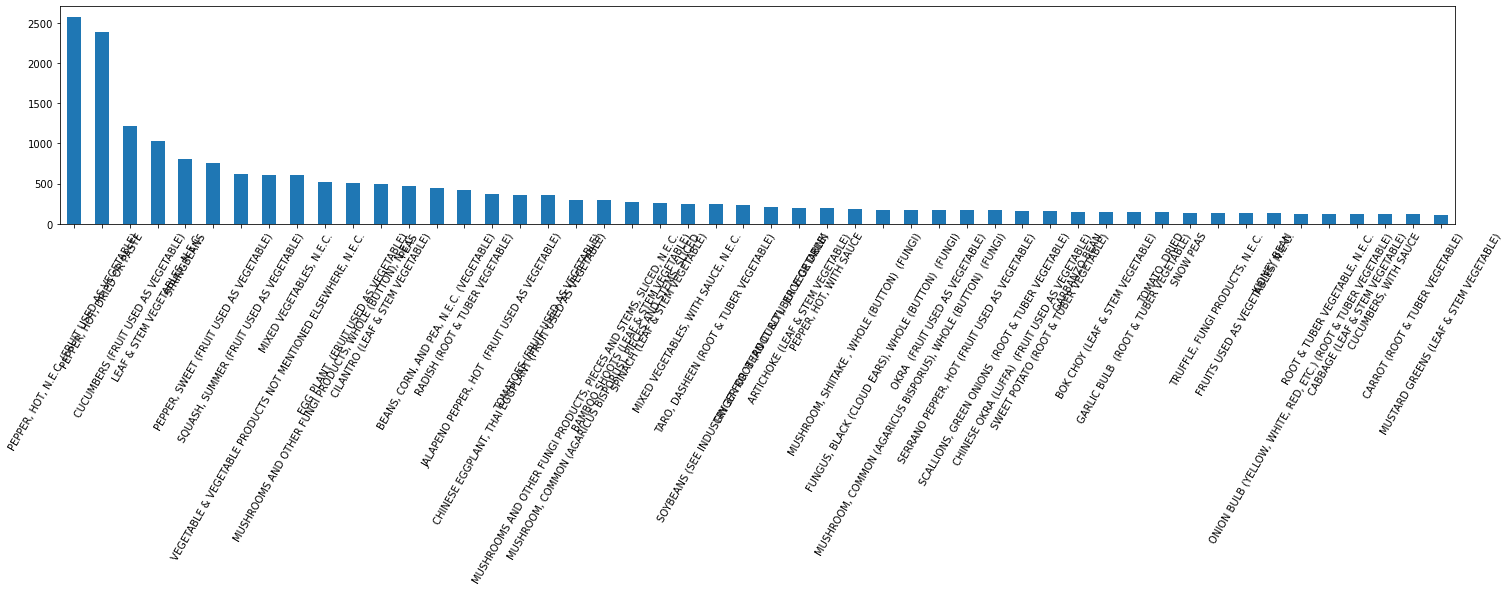

In [118]:
#Vegetables and Vegetable Products (24, 25)
vegetables = refusals[(refusals['Industry'] == '24') | (refusals['Industry'] == '25')]
vegetables.shape
vegetables.head(2)
vegetables['product types'].nunique()

vegetables['product types'].value_counts(normalize=True)
vegetables['product types'].value_counts().nlargest(50).plot(kind= 'bar', rot='60', figsize=(25,4))

# <font colors='b'> Vegitables(품목단위)
## 미국, EU(RASFF), 중국, 일본, 대만 등등의 동일한 제품군으로(Vegitables) 시간과 공간에 따른 출현빈도를 분석
## Vegitables(품목단위)에 관련있는 키워드(지정어)로 검색량의 증가추이 분석
   - Story telling : 과거에 관련 키워드가 증가하니(지역, 시기, 구글트랜드), 미국과 유렵의 부적합 건수가 많아지고 국내 수입식품 부적합이 증가한다는 

In [101]:
file = open('../data/fda food code.txt', 'r', encoding= 'UTF8')
indus_no = []
industry = []
while True:
    line = file.readline()
    if not line:
        break
    indus_no.append(line.split('\t')[0])
    industry.append(line.split('\t')[1])
    #print(line)
file.close()

## 3. FDA Inpections 결과 (District Decision/Classification)
### OAI와 VAI 처분을 받은 업체이면서 한국에 수입신고를 한 업체 탐색 (일명 freakyman)
- OAI – Official Action Indicated (강한행정처분)
- NAI – No Action Indicated  (행정처분 없음)
- VAI – Voluntary Action Indicated  (중간행정처분)

### mapping 해보기 (국내 '해외제조업소명', FDA 'Legal Name')

In [78]:
mfds = set(df['해외제조업소명'])
fda_refusals = set(refusals['Firm Legal Name'])

In [79]:
unions = (mfds & fda_refusals)
unions

{'ACETAIA MALPIGHI SRL',
 "ACQUE MINERALI D'ITALIA S.P.A.",
 'ADM AGRI-INDUSTRIES COMPANY',
 'AGRO IMPEX',
 'AGRO SEVILLA ACEITUNAS, S.C.A.',
 'AIM HIGH TOLLING SOLUTIONS INC.',
 'AIYA CO LTD',
 'ALAIN MILLIAT SAS',
 'ALFOCAN S.A.',
 'ALIMENT INDUSTRY CO.,LTD',
 'ALIMENTOS COOK S.A.',
 'ALKALOID AD',
 'AMD-VERDE',
 'AMEHAMA CONFECTIONERY CO., LTD.',
 'ANDROS SNC',
 'APPETAIS ITALIA SPA',
 'AVOCADO OIL DE MEXICO S DE RL DE CV',
 'Asian Sea Corporation Public Company Limited',
 'BAODING LUCHENG FOOD CO.,LTD',
 'BASF SE',
 'BELLSOLA SAU',
 'BEREISHIS JERUSALEM LTD',
 'BIOFAC A/S',
 'BIOSOTA ORGANICS PTY LTD',
 'BONBONS BARNIER S.A.',
 'BRIDOR',
 'BRT INDUSTRY CO., LTD',
 'C NORTE PESCADOS LTDA',
 'CAMPASA CAMAROES DO PARA S/A',
 'CAMPOSOL S.A.',
 'CASA CUERVO SA DE CV',
 'CASEIFICIO PALAZZO SPA',
 'CERTMEDICA INTERNATIONAL GMBH',
 'CHARBONNEAUX-BRABANT S.A.',
 'CHO COMPANY',
 'CHUPA CHUPS S.A.U.',
 'CN LAB NUTRITION, ASIAN GROUP',
 'COMPANHIA MULLER DE BEBIDAS',
 'CONAGRA BRANDS',
 'CONSE

In [80]:
len(unions)

316

,FEI Number,Firm Legal Name,Firm Address,Product Code and Description,Refused Date,Import Division,Shipment ID,FDA Sample Analysis,Private Lab Analysis,Refusal Charges,Firm Profile
258,3008679281,COSUMAR,"8 Rue El Moutamid Ibnou Abbad, , Casablanca, C...","21GGP10 \ OLIVES, BLACK, (PIT FRUIT)",2021-03-25,Division of Northern Border Imports (DNBI),551-4635683-3/221/1/,Yes,No,241,https://datadashboard.fda.gov/ora/firmprofile....
1461,3005230638,PRAVIN MASALEWALE,"PLOT NO.44, HADAPSAR INDUSTRIAL ESTATE, PUNE, ...","28AGT56 \ FENUGREEK, WHOLE (SPICE)",2021-02-25,Division of West Coast Imports (DWCI),KM6-1551356-1/141/1/,No,No,9,https://datadashboard.fda.gov/ora/firmprofile....
1815,3012336777,Fonterra Limited,"109 Fanshawe Street, , Auckland, , New Zealand","09CEH16 \ MILK, DRIED",2021-02-17,Division of Northeast Imports (DNEI),EJ4-0033220-4/42/1/,No,No,"482,488",https://datadashboard.fda.gov/ora/firmprofile....
1816,3012336777,Fonterra Limited,"109 Fanshawe Street, , Auckland, , New Zealand","09CEH16 \ MILK, DRIED",2021-02-17,Division of Northeast Imports (DNEI),EJ4-0033220-4/32/1/,No,No,"482,488",https://datadashboard.fda.gov/ora/firmprofile....
1817,3012336777,Fonterra Limited,"109 Fanshawe Street, , Auckland, , New Zealand","09CEH16 \ MILK, DRIED",2021-02-17,Division of Northeast Imports (DNEI),EJ4-0033220-4/22/1/,No,No,"482,488",https://datadashboard.fda.gov/ora/firmprofile....


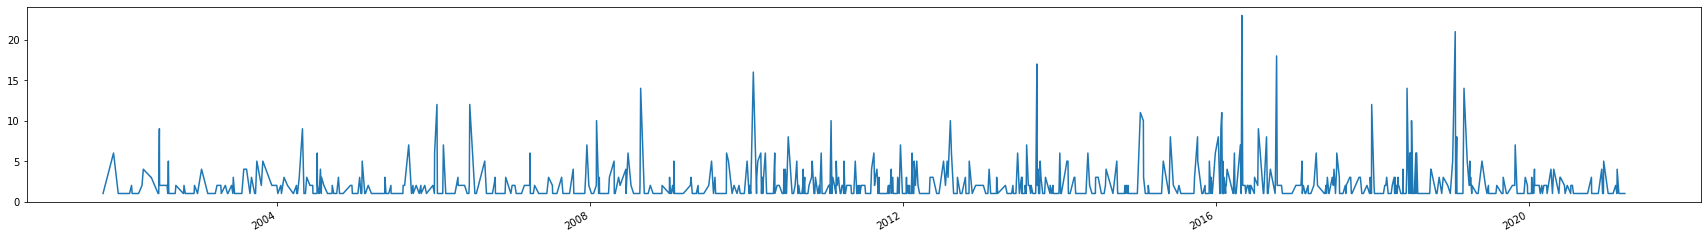

In [86]:
refusals.loc[refusals['Firm Legal Name'].isin(unions), :].head()
refusals.loc[refusals['Firm Legal Name'].isin(unions), :]['Refused Date'].value_counts().plot(figsize=(30,4))

In [87]:
data = refusals.loc[inspections['Firm Legal Name'].isin(unions), :]
freakygirls = set(data['Firm Legal Name'])

## <font color ='red'> 미국 FDA의 수입검사결과 부적합 받은 업체이면서 한국에 수입신고를 한 업체 리스트 : 316개 업체

In [89]:
freakygirls

{'ACETAIA MALPIGHI SRL',
 "ACQUE MINERALI D'ITALIA S.P.A.",
 'ADM AGRI-INDUSTRIES COMPANY',
 'AGRO IMPEX',
 'AGRO SEVILLA ACEITUNAS, S.C.A.',
 'AIM HIGH TOLLING SOLUTIONS INC.',
 'AIYA CO LTD',
 'ALAIN MILLIAT SAS',
 'ALFOCAN S.A.',
 'ALIMENT INDUSTRY CO.,LTD',
 'ALIMENTOS COOK S.A.',
 'ALKALOID AD',
 'AMD-VERDE',
 'AMEHAMA CONFECTIONERY CO., LTD.',
 'ANDROS SNC',
 'APPETAIS ITALIA SPA',
 'AVOCADO OIL DE MEXICO S DE RL DE CV',
 'Asian Sea Corporation Public Company Limited',
 'BAODING LUCHENG FOOD CO.,LTD',
 'BASF SE',
 'BELLSOLA SAU',
 'BEREISHIS JERUSALEM LTD',
 'BIOFAC A/S',
 'BIOSOTA ORGANICS PTY LTD',
 'BONBONS BARNIER S.A.',
 'BRIDOR',
 'BRT INDUSTRY CO., LTD',
 'C NORTE PESCADOS LTDA',
 'CAMPASA CAMAROES DO PARA S/A',
 'CAMPOSOL S.A.',
 'CASA CUERVO SA DE CV',
 'CASEIFICIO PALAZZO SPA',
 'CERTMEDICA INTERNATIONAL GMBH',
 'CHARBONNEAUX-BRABANT S.A.',
 'CHO COMPANY',
 'CHUPA CHUPS S.A.U.',
 'CN LAB NUTRITION, ASIAN GROUP',
 'COMPANHIA MULLER DE BEBIDAS',
 'CONAGRA BRANDS',
 'CONSE

In [91]:
len(freakygirls)

316

## 4. 국내 수입신고민원에서 freakygirls을 탐색하고 수입신고 건수와 검사 결과 확인하기

In [92]:
df.loc[df['해외제조업소명'].isin(freakygirls), :].head()
df.loc[df['해외제조업소명'].isin(freakygirls), :]['판정결과'].value_counts()

,접수번호,제품구분,접수일,신고시기,유형,제품명,제품명(한글),용도코드,용도명,세번부호(HSK),...,필증교부방법,보관창고번호.1,보관업 상호,반입일자,신속검사대상,가온보존대상,진균수시험대상,방사선조사식품,판정조치 구분코드,판정결과
0,201600529568,수산물,2016-06-21 00:00:00,본신고,"오징어(냉동,다리)",FROZEN SQUID(LEG),냉동오징어(다리),1,판매용,307491020,...,nan,3011717,(주)성보냉장 장림 보세장치장,2016-06-17,N,N,N,N,1,0
2,201600524478,수산물,2016-03-28 00:00:00,본신고,"오징어(냉동,동체,자숙)",FROZEN SQUID BOILED(BODY),"냉동오징어(동체,자숙)",1,판매용,1605542099,...,nan,3011717,(주)성보냉장 장림 보세장치장,2016-03-25,N,N,N,N,1,0
3,201600520164,수산물,2016-01-06 00:00:00,본신고,"오징어(냉동,동체,자숙)",FROZEN SQUID BOILED(BODY),"냉동오징어(동체,자숙)",1,판매용,1605542099,...,nan,3011717,(주)성보냉장 장림 보세장치장,2016-01-06,N,N,N,N,1,0
263,IFDG16052257,축산물,2016-05-26 15:46:38,본신고,"소고기(냉동,정육(뼈있는것),소고기정육/지육)",FROZEN BONE-IN BEEF,냉동쇠고기,1,판매용,202201000,...,nan,1211076,(주)씨에스냉장 보세창고,2016-05-26,N,N,N,N,1,0
537,IFDG16020922,축산물,2016-02-15 20:27:47,본신고,"소고기(냉동,정육(뼈있는것),소고기정육/지육)",FROZEN BONE-IN BEEF,냉동쇠고기,1,판매용,202201000,...,nan,1206017,정양산업(주) 이천 보세창고,2016-02-15,N,N,N,N,1,0


0    47139
1       68
Name: 판정결과, dtype: int64

## freakyman과 freakygirls 동시 업체

In [94]:
freaky = (freakyman & freakygirls)
len(freaky)

69

In [95]:
df.loc[df['해외제조업소명'].isin(freaky), :].head()
df.loc[df['해외제조업소명'].isin(freaky), :]['판정결과'].value_counts()

,접수번호,제품구분,접수일,신고시기,유형,제품명,제품명(한글),용도코드,용도명,세번부호(HSK),...,필증교부방법,보관창고번호.1,보관업 상호,반입일자,신속검사대상,가온보존대상,진균수시험대상,방사선조사식품,판정조치 구분코드,판정결과
0,201600529568,수산물,2016-06-21 00:00:00,본신고,"오징어(냉동,다리)",FROZEN SQUID(LEG),냉동오징어(다리),1,판매용,307491020,...,nan,3011717,(주)성보냉장 장림 보세장치장,2016-06-17,N,N,N,N,1,0
2,201600524478,수산물,2016-03-28 00:00:00,본신고,"오징어(냉동,동체,자숙)",FROZEN SQUID BOILED(BODY),"냉동오징어(동체,자숙)",1,판매용,1605542099,...,nan,3011717,(주)성보냉장 장림 보세장치장,2016-03-25,N,N,N,N,1,0
3,201600520164,수산물,2016-01-06 00:00:00,본신고,"오징어(냉동,동체,자숙)",FROZEN SQUID BOILED(BODY),"냉동오징어(동체,자숙)",1,판매용,1605542099,...,nan,3011717,(주)성보냉장 장림 보세장치장,2016-01-06,N,N,N,N,1,0
263,IFDG16052257,축산물,2016-05-26 15:46:38,본신고,"소고기(냉동,정육(뼈있는것),소고기정육/지육)",FROZEN BONE-IN BEEF,냉동쇠고기,1,판매용,202201000,...,nan,1211076,(주)씨에스냉장 보세창고,2016-05-26,N,N,N,N,1,0
537,IFDG16020922,축산물,2016-02-15 20:27:47,본신고,"소고기(냉동,정육(뼈있는것),소고기정육/지육)",FROZEN BONE-IN BEEF,냉동쇠고기,1,판매용,202201000,...,nan,1206017,정양산업(주) 이천 보세창고,2016-02-15,N,N,N,N,1,0


0    24564
1        6
Name: 판정결과, dtype: int64